In [23]:
%pylab inline
import katpoint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator
from matplotlib.font_manager import FontProperties
import shelve
from astropy.time import Time

Populating the interactive namespace from numpy and matplotlib


C:\Users\Rishad Ebrahim\AppData\Roaming\Python\Python37\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['source', 'f', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [24]:
#filename = 'full-target-sched.csv'
# filename = './sources/SourceCatalogue.txt'
filename = './sources_for_2019_campaign'
cat = katpoint.Catalogue(open(filename))
cat.antenna = katpoint.Antenna('Khutunse, 5.750721, -0.304974, 116, 32.0')

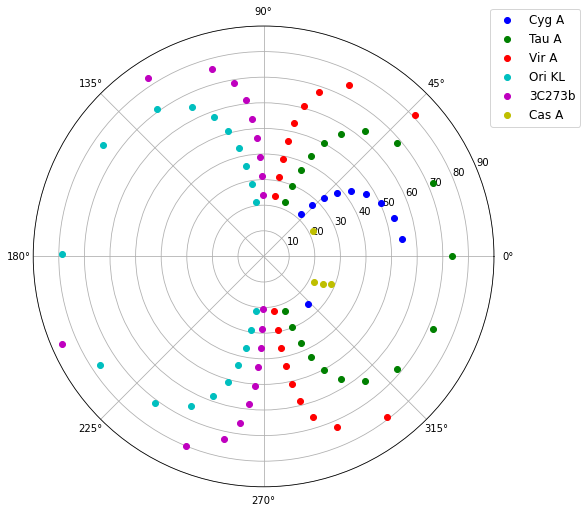

In [25]:
markers = []
colors = ['b','g','r','c','m','y','k']
pointtypes = ['o','*','x','^','s','p','h','+','D','d','v','H','d','v']
for point in  pointtypes:
    for color in colors:
        markers.append(str(color+point))

ncount = 0
lines = list()
labels = list()
fig = plt.figure(figsize=[8,8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
# starttime = '2017-04-21 06:00:00'
starttime = '2022-12-07 19:00:00' 
elevmax, elevmin, azimumax, azimumin, timemax, timemin, source = [],[],[],[],[],[],[]

for c in cat.targets:
    azimuth,elevation = np.array([]),np.array([])
    t = katpoint.Timestamp(starttime).secs + np.arange(0, 20. * 60. * 60., 1800.)
    a,e = katpoint.rad2deg(c.azel(t)[0]),katpoint.rad2deg(c.azel(t)[1])
    goodel = np.array([ee > 20. for ee in e])
    goodaz = np.array([np.logical_and(aa >= 0.,aa <= 340.) for aa in a])
    azim   = a[goodel*goodaz]
    elev   = e[goodel*goodaz]
    temps  = t[goodel*goodaz]
    if azim.any() and elev.any():
        myplot,= ax.plot(np.radians(azim),elev, markers[ncount],label=c.name)
        tmin, tmax = np.min(temps), np.max(temps)
        elmin, elmax = elev[np.where(temps == tmin)], elev[np.where(temps == tmax)]
        azmin, azmax = azim[np.where(temps == tmin)], azim[np.where(temps == tmax)]
        elevmax.append(elmax)
        elevmin.append(elmin)
        azimumax.append(azmax)
        azimumin.append(azmin)
        timemax.append(tmax)
        timemin.append(tmin)
        source.append(c.name)
        tmin, tmax = katpoint.Timestamp(tmin).to_string(),katpoint.Timestamp(tmax).to_string()
        #print 'Source: %s' % (c.name),'el range = %3.2f - %3.2f' % (elmin, elmax),'--- az range = %3.2f - %3.2f' % (azmin, azmax),'time = %s - %s' %(tmin, tmax)
        #print 'With %s, we can get %d MDS' %(c.name,len(azim)),'within the range az = %f - %f, elevation = %f - %f' %(np.min(azim),np.max(azim),np.min(elev),np.max(elev))
        lines.append(myplot)
        labels.append(c.name)
    ncount += 1
    
ax.grid(True)
ax.set_rmax(90)
#plt.legend(bbox_to_anchor=(1.10, 1.10), fontsize=12)
plt.legend(bbox_to_anchor=(1.20, 1.05), fontsize=12)

$\textbf{Source appearing as a function of the maximum time}$

In [26]:
elevmax = np.array(np.array(elevmax).flatten())
elevmin = np.array(np.array(elevmin).flatten())
azimumax = np.array(np.array(azimumax).flatten())
azimumin = np.array(np.array(azimumin).flatten())
timemax = np.array(np.array(timemax).flatten())
timemin = np.array(np.array(timemin).flatten())
source = np.array(np.array(source).flatten())
ind = np.argsort(timemax)
elmi = elevmin[ind]
elma = elevmax[ind]
azma = azimumax[ind]
azmi = azimumin[ind]
tmi = timemin[ind]
tma = timemax[ind]
sou = source[ind]

#print timemax.flatten()
#print elevmax[ind]
for a,b,c,d,e,f,s in zip(elmi,elma,azmi,azma,tmi,tma,sou):
    es = katpoint.Timestamp(e).to_string()
    fs = katpoint.Timestamp(f).to_string()
    print('Source: %s' % (s),'| el range = %3.2f - %3.2f' % (a, b),'| az range = %3.2f - %3.2f' % (c, d),'| time = %s - %s' %(es, fs))

Source: Tau A | el range = 22.79 - 22.85 | az range = 68.49 - 291.51 | time = 2022-12-07 20:00:00 - 2022-12-08 05:00:00
Source: Ori KL | el range = 21.37 - 21.66 | az range = 98.06 - 261.90 | time = 2022-12-07 20:00:00 - 2022-12-08 05:00:00
Source: Vir A | el range = 24.20 - 21.77 | az range = 79.12 - 280.93 | time = 2022-12-08 03:00:00 - 2022-12-08 12:00:00
Source: 3C273b | el range = 24.05 - 20.73 | az range = 90.45 - 269.89 | time = 2022-12-08 03:00:00 - 2022-12-08 12:00:00
Source: Cyg A | el range = 25.39 - 54.60 | az range = 312.77 - 7.24 | time = 2022-12-07 19:00:00 - 2022-12-08 14:30:00
Source: Cas A | el range = 28.55 - 21.62 | az range = 337.73 - 27.59 | time = 2022-12-07 21:00:00 - 2022-12-08 14:30:00


##### Check the locations of data points that were used to build the last pointing model

In [7]:
check_old_location = True
if check_old_location == True:
    old_coord_list = np.loadtxt('./offset/offsets_listPM-28-04-April-2019_mdlpo.ctl.txt')
    azim, elev = old_coord_list[:,0], old_coord_list[:,1]
    
    fig = plt.figure(figsize=[7,7])
    ax = fig.add_axes([0.2, 0.2, 0.9, 0.9], projection='polar')
    p1,= ax.plot(np.radians(azim),np.array(elev),'o')

OSError: ./offset/offsets_listPM-28-04-April-2019_mdlpo.ctl.txt not found.

##### check trajectory

In [5]:
def CheckTrajectory(startTime, duration, timeResolution, ra, dec):
    target = katpoint.construct_radec_target(ra, dec)
    target.antenna = katpoint.Antenna('Khutunse, 5.750721, -0.304974, 116, 32.0')
    t = katpoint.Timestamp(startTime).secs + np.arange(0, duration, timeResolution)
    for c in t:
        elev = katpoint.rad2deg(target.azel(c)[1])
        azim = katpoint.rad2deg(target.azel(c)[0])
        print('azimuth = ', azim ,', elevation = ', elev, "|", katpoint.Timestamp(c).to_string())

In [6]:
#CheckTrajectory('2021-11-05 11:15:00', 5 * 60.*60., 600, '05:34:31.94', '+22:00:52.2')
CheckTrajectory('2022-12-07 07:00:00', 10 * 60.*60., 600, '12:30:49.42', '+12:23:28.04')#virgoA 12:30:49.42338, +12:23:28.0439

azimuth =  47.23447714864125 , elevation =  80.31418637456396 | 2022-12-07 07:00:00
azimuth =  35.44452220716164 , elevation =  81.97095804077726 | 2022-12-07 07:10:00
azimuth =  18.65537422723128 , elevation =  83.11805416093506 | 2022-12-07 07:20:00
azimuth =  357.77126465022417 , elevation =  83.48058011151183 | 2022-12-07 07:30:00
azimuth =  337.4525993412168 , elevation =  82.93666482714703 | 2022-12-07 07:40:00
azimuth =  321.74043217451947 , elevation =  81.66187832045586 | 2022-12-07 07:50:00
azimuth =  310.8450510142985 , elevation =  79.93010434696663 | 2022-12-07 08:00:00
azimuth =  303.393451233598 , elevation =  77.9366453358067 | 2022-12-07 08:10:00
azimuth =  298.17188089614996 , elevation =  75.7912829175057 | 2022-12-07 08:20:00
azimuth =  294.3921908132483 , elevation =  73.55343973784272 | 2022-12-07 08:30:00
azimuth =  291.57170517662655 , elevation =  71.25631051618403 | 2022-12-07 08:40:00
azimuth =  289.41189007804184 , elevation =  68.91934763128583 | 2022-12-07

In [17]:
CheckTrajectory('2022-12-07 07:41:00', 24 * 60.*60., 3600, '23:23:24.8', '+58:48:59.0')#CASA,     radec, 232324.8, +584859.0

azimuth =  11.026904990425997 , elevation =  -23.376214858889213 | 2022-12-07 07:41:00
azimuth =  18.272477237454954 , elevation =  -19.56642925495719 | 2022-12-07 08:41:00
azimuth =  24.040498566997144 , elevation =  -14.134749492034874 | 2022-12-07 09:41:00
azimuth =  28.141784691874264 , elevation =  -7.521157573434275 | 2022-12-07 10:41:00
azimuth =  30.53790555272124 , elevation =  -0.1564710961485296 | 2022-12-07 11:41:00
azimuth =  31.218346073310833 , elevation =  7.556239986332399 | 2022-12-07 12:41:00
azimuth =  30.125966598594015 , elevation =  15.224448971276109 | 2022-12-07 13:41:00
azimuth =  27.13611788376534 , elevation =  22.432265640120526 | 2022-12-07 14:41:00
azimuth =  22.101812550338845 , elevation =  28.706052232418404 | 2022-12-07 15:41:00
azimuth =  15.000183124973326 , elevation =  33.50514121875529 | 2022-12-07 16:41:00
azimuth =  6.183788177812383 , elevation =  36.28238834283627 | 2022-12-07 17:41:00
azimuth =  356.5631407898323 , elevation =  36.6448494066

In [16]:
CheckTrajectory('2022-12-07 08:45:00', 24 * 60.*60., 3600, '18:06:14.7', '-20:31:32.1')#casa

azimuth =  114.63456189717904 , elevation =  21.161618228066374 | 2022-12-07 08:45:00
azimuth =  119.78341804072312 , elevation =  34.493042704833016 | 2022-12-07 09:45:00
azimuth =  128.57869361608357 , elevation =  46.92011086190224 | 2022-12-07 10:45:00
azimuth =  144.14013216817705 , elevation =  57.35658185707378 | 2022-12-07 11:45:00
azimuth =  170.20417502208073 , elevation =  63.326850210581924 | 2022-12-07 12:45:00
azimuth =  200.9020367749745 , elevation =  61.82197512132052 | 2022-12-07 13:45:00
azimuth =  222.81867948181971 , elevation =  53.76323299510841 | 2022-12-07 14:45:00
azimuth =  235.3283212108598 , elevation =  42.37683636564442 | 2022-12-07 15:45:00
azimuth =  242.4836820268785 , elevation =  29.527198065004846 | 2022-12-07 16:45:00
azimuth =  246.7084272360982 , elevation =  15.991419450913304 | 2022-12-07 17:45:00
azimuth =  249.12563118336573 , elevation =  2.1127604312886534 | 2022-12-07 18:45:00
azimuth =  250.1921242411282 , elevation =  -11.928682059938088

In [ ]:
# source=orikl,053514.16,-052221.5,2000

In [28]:
CheckTrajectory('2022-12-07 19:45:00', 10 * 60.*60., 3600, '05:34:31.9', '+22:00:52.20')#TAURUSA,  radec, 053431.94, +220052.2

azimuth =  68.64321674352055 , elevation =  19.304474424814273 | 2022-12-07 19:45:00
azimuth =  67.37966589801405 , elevation =  33.19592147955589 | 2022-12-07 20:45:00
azimuth =  63.65648880030508 , elevation =  46.842789705403106 | 2022-12-07 21:45:00
azimuth =  54.828810807522096 , elevation =  59.77407267228643 | 2022-12-07 22:45:00
azimuth =  32.80403254573724 , elevation =  70.38770852924435 | 2022-12-07 23:45:00
azimuth =  347.8735828824453 , elevation =  73.32632228756145 | 2022-12-08 00:45:00
azimuth =  313.7235932588654 , elevation =  65.62443022472583 | 2022-12-08 01:45:00
azimuth =  299.8518069036496 , elevation =  53.506892580463244 | 2022-12-08 02:45:00
azimuth =  294.08942218772 , elevation =  40.12724526060902 | 2022-12-08 03:45:00
azimuth =  291.7639886621408 , elevation =  26.324935589630655 | 2022-12-08 04:45:00


In [27]:
CheckTrajectory('2022-12-07 19:00:00', 25 * 60.*60., 3600, '05:35:16', '-05:23:22')#ORIONA,   radec, 053516.0, -052322.0

azimuth =  96.09829592378904 , elevation =  6.512342901891623 | 2022-12-07 19:00:00
azimuth =  98.07487070732068 , elevation =  21.36435702565257 | 2022-12-07 20:00:00
azimuth =  100.955359555801 , elevation =  36.1267249165571 | 2022-12-07 21:00:00
azimuth =  105.76124458036205 , elevation =  50.697120095554666 | 2022-12-07 22:00:00
azimuth =  115.7223105036386 , elevation =  64.73981144418246 | 2022-12-07 23:00:00
azimuth =  145.30794425208748 , elevation =  76.49248379807754 | 2022-12-08 00:00:00
azimuth =  213.60549195190288 , elevation =  76.66340245186795 | 2022-12-08 01:00:00
azimuth =  243.96359277472354 , elevation =  65.01374984122415 | 2022-12-08 02:00:00
azimuth =  254.10609584311229 , elevation =  50.99004300339442 | 2022-12-08 03:00:00
azimuth =  258.9713488719391 , elevation =  36.42560716444768 | 2022-12-08 04:00:00
azimuth =  261.8775397222662 , elevation =  21.665790349198158 | 2022-12-08 05:00:00
azimuth =  263.86722846900426 , elevation =  6.815079510908213 | 2022-1

# ID | Name(s), tags, RA(J2000), dec(J2000)
,         radec, 000000.0,  000000.0
3C84,     radec, 031948.2, +413042.1
3C123,    radec, 043704.2, +294015.1
0521M365, radec, 052258.0, -362730.9
TAURUSA,  radec, 053431.94, +220052.2
ORIONA,   radec, 053516.0, -052322.0
3C147,    radec, 054236.1, +495107.2
0552P398, radec, 055530.8, +394849.0
3C161,    radec, 062710.1, -055304.8
OJ287,    radec, 085448.9, +200631.0
3C218,    radec, 091805.7, -120544.0
4c39d25,  radec, 092703.0, +390221.0
3C273B,   radec, 122906.7, +020308.6
VIRGOA,   radec, 123049.4, +122328.0
3C279,    radec, 125611.2, -054721.5
3C286,    radec, 133108.3, +303033.0
3C295,    radec, 141120.7, +521209.1
3C345,    radec, 164258.8, +394837.0
3C348,    radec, 165108.2, +045933.0
3C353,    radec, 172028.2, -005848.0
3C380,    radec, 182931.7, +484447.0
3C391,    radec, 184923.4, -005529.0
1921M293, radec, 192451.1, -291430.1
CYGNUSA,  radec, 195928.4, +404402.0
2134P004, radec, 213638.6, +004154.2
3C454D3,  radec, 225357.8, +160853.6
CASA,     radec, 232324.8, +584859.0
SUN,      radec, 000000, +000000
MOON,      radec, 000000, +000000

In [12]:
CheckTrajectory('2022-12-07 11:00:00', 10 * 60.*60., 3600, '19:59:28.4', '+40:44:02')#CYGNUSA,  radec, 195928.4, +404402.0

azimuth =  46.76087524668714 , elevation =  26.842716862683687 | 2022-12-07 11:00:00
azimuth =  41.50230235941057 , elevation =  37.31169443566261 | 2022-12-07 12:00:00
azimuth =  32.22164963596693 , elevation =  46.36174631234828 | 2022-12-07 13:00:00
azimuth =  17.67082124139416 , elevation =  52.76583754608437 | 2022-12-07 14:00:00
azimuth =  358.68252116853057 , elevation =  54.940894211802004 | 2022-12-07 15:00:00
azimuth =  340.0797359828138 , elevation =  52.12471159435737 | 2022-12-07 16:00:00
azimuth =  326.26127974463753 , elevation =  45.27870029113228 | 2022-12-07 17:00:00
azimuth =  317.59732138625975 , elevation =  35.98171317028856 | 2022-12-07 18:00:00
azimuth =  312.7742242849903 , elevation =  25.38793096570058 | 2022-12-07 19:00:00
azimuth =  310.6852792292336 , elevation =  14.186039090059792 | 2022-12-07 20:00:00


In [10]:
CheckTrajectory('2022-12-05 08:45:00', 5 * 60.*60., 3600, '08:54:48.9', '+20:06:31')#OJ287,    radec, 085448.9, +200631.0

azimuth =  289.23539798988867 , elevation =  19.749264881301965 | 2022-12-05 08:45:00
azimuth =  289.6239264706357 , elevation =  5.627044090639012 | 2022-12-05 09:45:00
azimuth =  291.267160701914 , elevation =  -8.404880745422728 | 2022-12-05 10:45:00
azimuth =  294.3809619822528 , elevation =  -22.21117070913992 | 2022-12-05 11:45:00
azimuth =  299.6707795698876 , elevation =  -35.564754027121374 | 2022-12-05 12:45:00


### 